# Hello There Fellow Novice!

Hey! i decided to do this notebook because i saw many great notebooks out there about EDA/ Feature Engineering/ Model Making, however, much of that information was really hard to understand, so thought about making it easier and better explained for people that are completely new to ML like me! 

Feedback is appreciated!

First of all, Welcome to Kaggle, this is a great place to learn about ML, and an even better place to practice.
As a newcomer myself, i may tell you one thing, don't let yourself down seeing those 100% top 1 notebooks on the top of the leaderboard, there's some shady business up there (extended datasets and stuff!!!)
Instead of aiming for the 100% which is basically out of reach with the data we're given, let's aim to improve our personal score and learn more along the way.

The Notebook below may seem confusing and scary at first, but DON'T PANIC, get your towels and come with me, slowly!

Let's get to work then!

In [2]:
!pip install lightgbm

     |████████████████████████████████| 2.0 MB 1.2 MB/s eta 0:00:01     |████████████                    | 747 kB 360 kB/s eta 0:00:04


In [4]:
!pip install missingno

  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)


In [5]:
from sklearn import metrics,impute

import numpy as np #for math functions
import math # for mathematical operations
import pandas as pd #for dataframe management
import lightgbm as lgb # machine learning model
import missingno as msno # for NaN visualization
import warnings # to remove the annoying warnings
import seaborn as sns # for graphical visualization

import matplotlib.pyplot as plt # for graphical visualization

from sklearn.linear_model import LinearRegression # for model making
from sklearn.model_selection import train_test_split # for model making
from sklearn.compose import make_column_transformer  # to apply Standard Scaler
from sklearn.metrics import accuracy_score # for the vizualization of the Acuracy score
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler # for data preprocessing
from sklearn.model_selection import cross_validate,GridSearchCV # to make the cross validation of the model

warnings.filterwarnings(action='ignore', category=UserWarning)

#Change size of the plot in seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})


**Let's define our datasets for training and testing:**

In [7]:
#train= pd.read_csv('../input/titanic/train.csv',index_col="PassengerId")
#test = pd.read_csv('../input/titanic/test.csv',index_col="PassengerId")

train= pd.read_csv('train.csv',index_col="PassengerId")
test = pd.read_csv('test.csv',index_col="PassengerId")



In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**Then let's merge both to get a full dataset, which we will be working on!**

In [9]:
df_combined= pd.concat([train, test])

# **1.Study the data**
**Let's take a look at the data we are dealing with!**

**For Train Dataset**

**It seems like we have:**
12 columns,
891 rows.

**We have empty values at:**
Age,
Cabin,
Embarked.

**From the 12 columns:**
5 are integer values,
2 are float values,
5 are objects.

In [10]:
#get the information about each column of the dataset,

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**For Test Dataset**

**It seems like we have:**
11 columns,
418 rows.

**We have empty values at:**
Age,
Fare,
Cabin,
Embarked.

**From the 11 columns:**
4 are integer values,
2 are float values,
5 are objects.

In [11]:
#get the information about each column of the dataset

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


**For the Combined Dataframe**

**It seems like we have:**
12 columns,
1309 rows.

**We have empty values at:**
Survived,
Age,
Fare,
Cabin,
Embarked.

**From the 12 columns:**
4 are integer values,
3 are float values,
5 are objects.

In [12]:
df_combined.info()#get the information about each column of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [13]:
print("train columns: ", train.columns)

print("test columns: ", test.columns)

train columns:  Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
test columns:  Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


**As we can see, the Test dataset Lacks the "survived" column, which is our Target!**

In [14]:
#Select Numerical columns

num_cols = df_combined.select_dtypes(exclude="object").columns

#Select Categorical columns

cat_cols = df_combined.select_dtypes(include="object").columns

print("numerical columns are:", num_cols)
print("categorical columns are:", cat_cols)

numerical columns are: Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
categorical columns are: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [15]:
#Check for unique values in each column

n_uniqe = {col:df_combined[col].nunique() for col in cat_cols}
for key in n_uniqe:
    print(f"{key} has {n_uniqe[key]} unique values")

Name has 1307 unique values
Sex has 2 unique values
Ticket has 929 unique values
Cabin has 186 unique values
Embarked has 3 unique values


**Seems we have duplicated and/or missing values in Ticket, and Cabin columns**

In [16]:
#get the information about each column of the dataset

train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**We can see from this description that:
our ages range from 5 months old to 80 years old,**

In [17]:
#get the information about each column of the dataset

test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [18]:
#get the information about each column of the dataset

df_combined.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [19]:
#get the number of null values in the dataset

train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [20]:
#get the number of null values in the dataset

test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [21]:
#get the number of null values in the dataset

df_combined.isna().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

# **2.Exploratory Data Analysis**

**First, let's take a look at the state of our dataframe**

<AxesSubplot:>

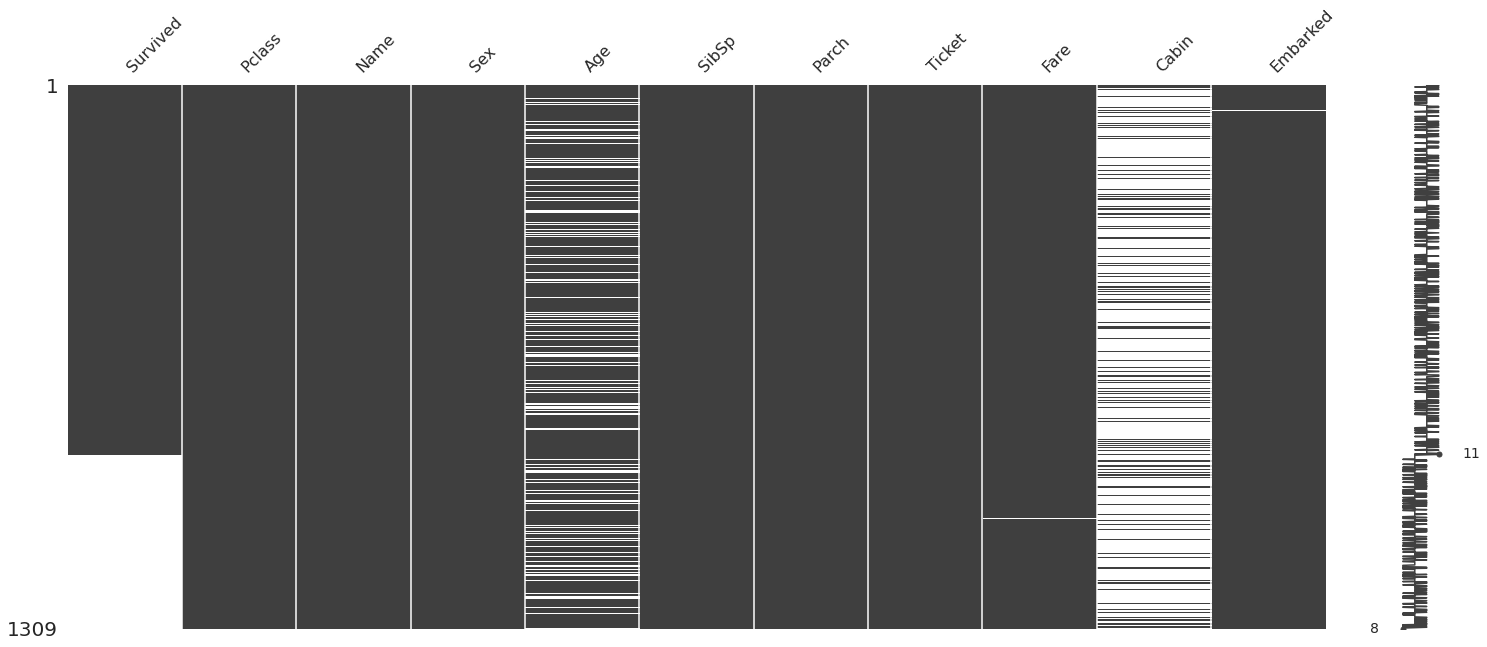

In [22]:
#Let's start by visualizing the empty rows on each feature using missingno

msno.matrix(df_combined)

**We have a lot of missing values on Age and Cabin, around 80% of cabin values are empty, for this model, we are going to drop this column, but feel free to try different approaches, like inputting values based on correlations!**

In [23]:
#Drop the Cabin columns
df_combined = df_combined.drop(['Cabin'], axis=1)


In [24]:
#Classify the Age group

df_combined['Age_Class'] = (df_combined['Age']/20)+0.5
df_combined['Age_Class'] = round(df_combined['Age_Class'])

#Classify the Fare group

df_combined['Fare_Class'] = (df_combined['Fare']/100)+0.5
df_combined['Fare_Class'] = round(df_combined['Fare_Class'])

**The Age group we defined is:**
* From 0 - 20 - group 1
* From 21- 40 - group 2
* From 41- 60 - group 3
* Ages 61+ - group 4 

**The Fare group we defined is:**
* From 0 - 100 - group 1
* From 101- 200 - group 2
* From 201- 300 - group 3
* From 301- 400 - group 4
* From 401- 500 - group 5
* Fares 501+ - group 6

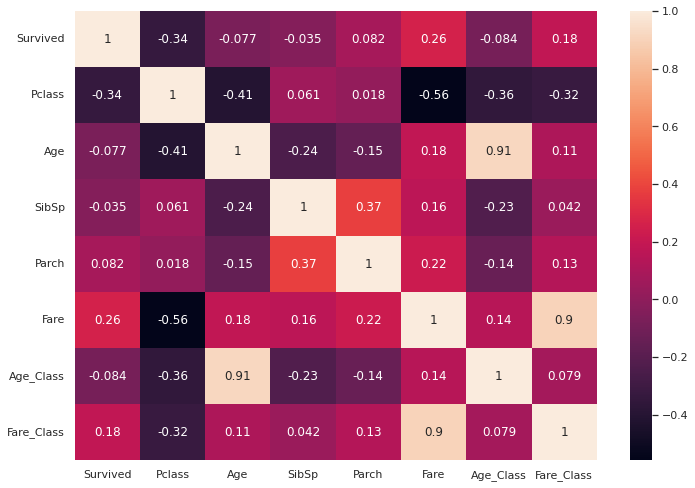

In [25]:
#create a heatmap to identify correlation between columns

sns.heatmap(df_combined.corr(),annot=True)
plt.show()

**We have strong correlations between:**
* Fare and Survival
* Parch and SibSp(Family on board)

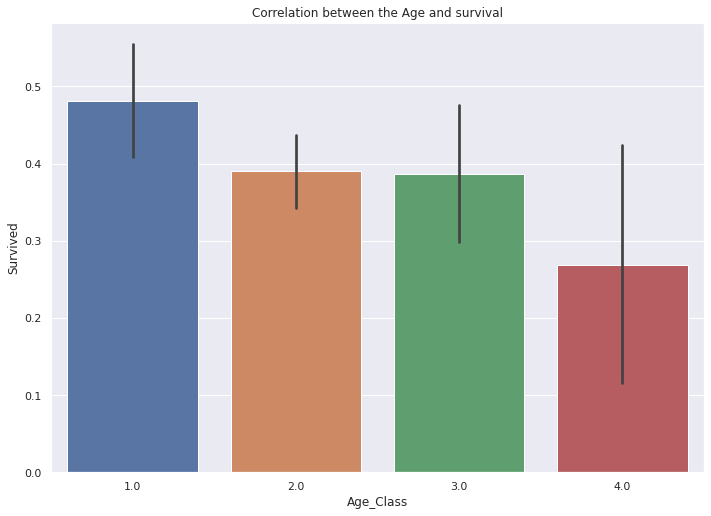

In [26]:
#create a bar graph with the correlation between age and survival

sns.barplot(data=df_combined,x='Age_Class',y="Survived")
plt.title("Correlation between the Age and survival")
plt.show()

We can see that younger people have greater chances of survival

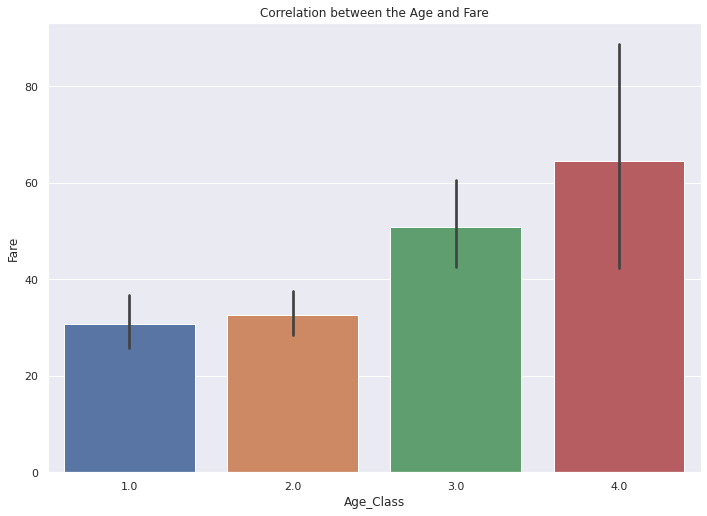

In [27]:
#create a bar graph with the correlation between Age_Class and Fare

sns.barplot(data=df_combined,x='Age_Class',y="Fare")
plt.title("Correlation between the Age and Fare")
plt.show()

We can see that older people payed the higher fares

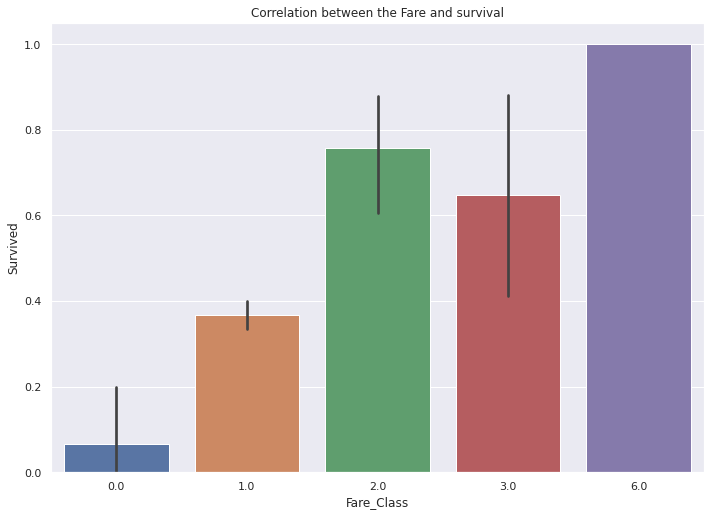

In [28]:
#create a bar graph with the correlation between Fare_Class and survival

sns.barplot(data=df_combined,x='Fare_Class',y="Survived")
plt.title("Correlation between the Fare and survival")
plt.show()

**We can see that the people who paid the highest fares had more chances of survival**

In [29]:
#Check for unique values in each column

n_uniqe = {col:df_combined[col].nunique() for col in df_combined}
for key in n_uniqe:
    print(f"{key} has {n_uniqe[key]} unique values")

Survived has 2 unique values
Pclass has 3 unique values
Name has 1307 unique values
Sex has 2 unique values
Age has 98 unique values
SibSp has 7 unique values
Parch has 8 unique values
Ticket has 929 unique values
Fare has 281 unique values
Embarked has 3 unique values
Age_Class has 4 unique values
Fare_Class has 5 unique values


**Let's get the number of relatives for each passenger by getting the sum of Parch and SibSp**

In [30]:
df_combined["SibSp"].describe().T

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: SibSp, dtype: float64

In [31]:
df_combined['Parch'].describe().T

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: Parch, dtype: float64

In [32]:
df_combined['relatives'] = df_combined['Parch']+df_combined["SibSp"]

In [33]:
df_combined['relatives'].describe().T

count    1309.000000
mean        0.883881
std         1.583639
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: relatives, dtype: float64

**Now, let's check for the correlation between Survival and Relative count**

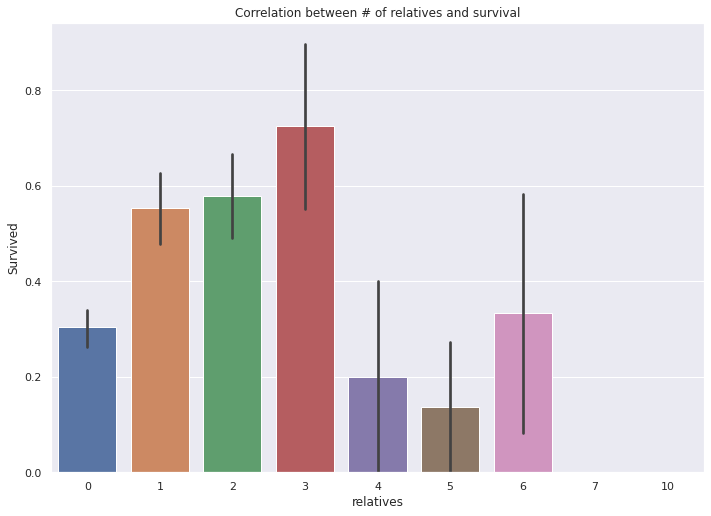

In [34]:
#create a bar graph with the correlation between relatives and survival

sns.barplot(data=df_combined,x='relatives',y="Survived")
plt.title("Correlation between # of relatives and survival")
plt.show()

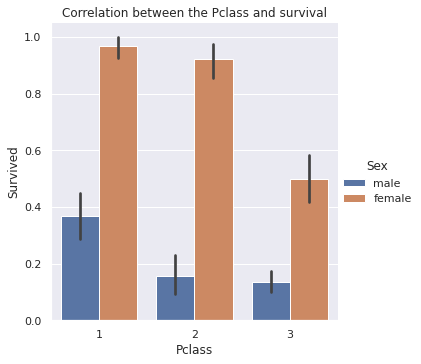

In [35]:
#create a bar graph with the correlation between Pclass and survival - by gender

sns.factorplot(x = 'Pclass', y='Survived', 
               hue = 'Sex',data=df_combined, kind='bar')
plt.title("Correlation between the Pclass and survival")
plt.show()

**There we go! we have a major correlation between the Pclass/Sex column and survival,females at class 1 and 2 are almost certain to survive! whilst males have a way lower survival chance across all classes!**

# 3.Preprocessing Data

<AxesSubplot:>

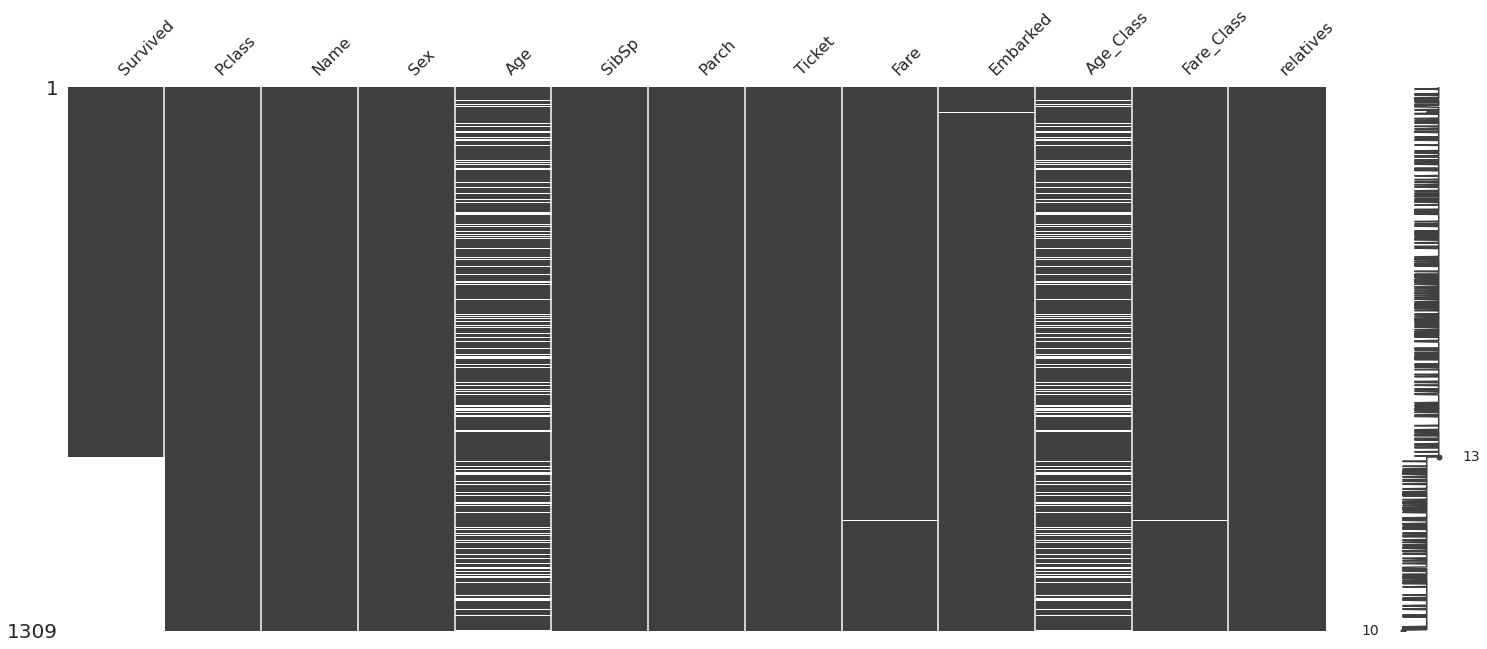

In [36]:
msno.matrix(df_combined)

**We still have quite a few missing values at Age, and on Age_Class consequently.
Since there aren't as much missing values as the Cabin column, let's try to fill in those Gaps using Fillna!**

In [37]:
#input the missing values in the Age and cabin column using Fillna

df_combined["Age"] = df_combined["Age"].fillna(method='ffill')


#Let's Also reset the Age_Class since we filled the columns

df_combined['Age_Class'] = (df_combined['Age']/20)+0.5
df_combined['Age_Class'] = round(df_combined['Age_Class'])

In [38]:
#Normalize the sex column setting male to 1 and female to 0

df_combined["Sex"] = [1 if x=="male" else 0 for x in df_combined["Sex"]]

<AxesSubplot:>

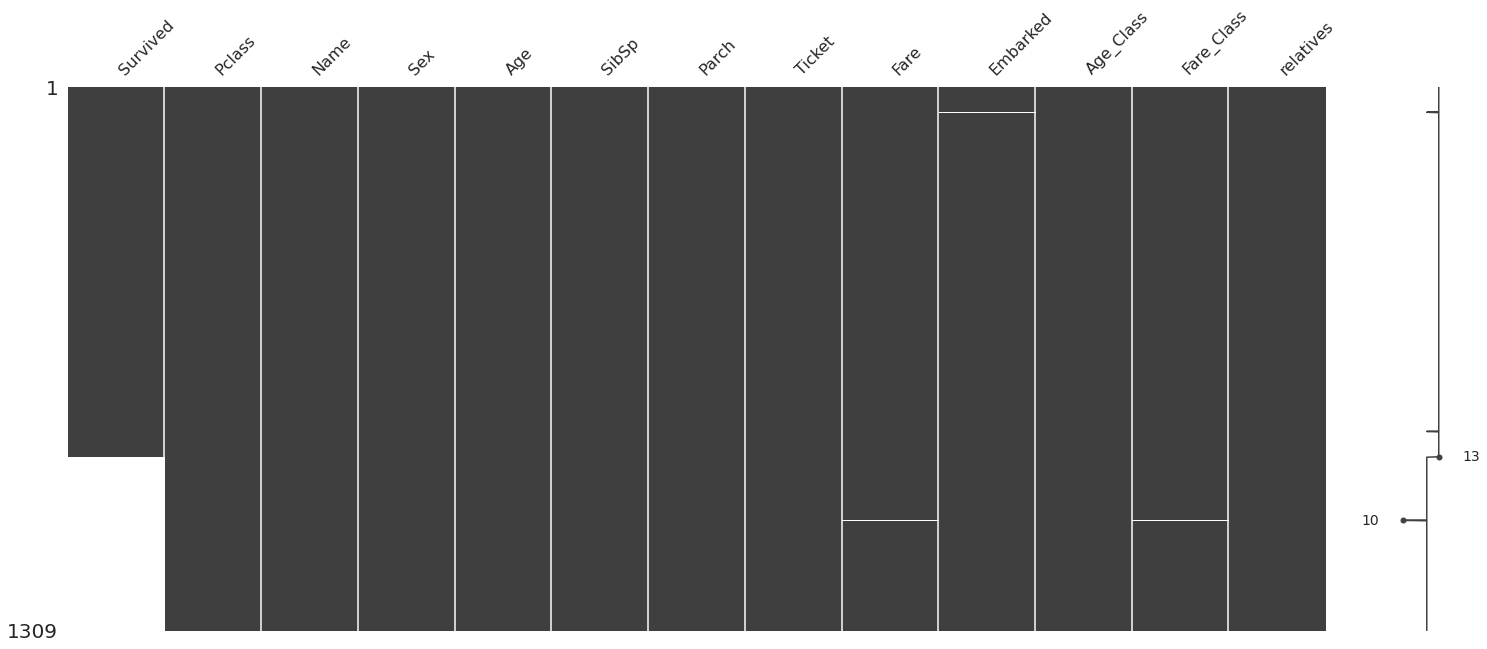

In [39]:
msno.matrix(df_combined)

**Much better, we still have that one empty value at Fare and Embarked, so let's deal with that very quickly**

In [40]:
#Let's start by filling these few empty rows in Embarked and Fare

df_combined["Embarked"] = df_combined["Embarked"].fillna(method='ffill')
df_combined["Fare"] = df_combined["Fare"].fillna(method='ffill')


#Classify the Fare group again, since we filled the values

df_combined['Fare_Class'] = (df_combined['Fare']/100)+0.5
df_combined['Fare_Class'] = round(df_combined['Fare_Class'])

<AxesSubplot:>

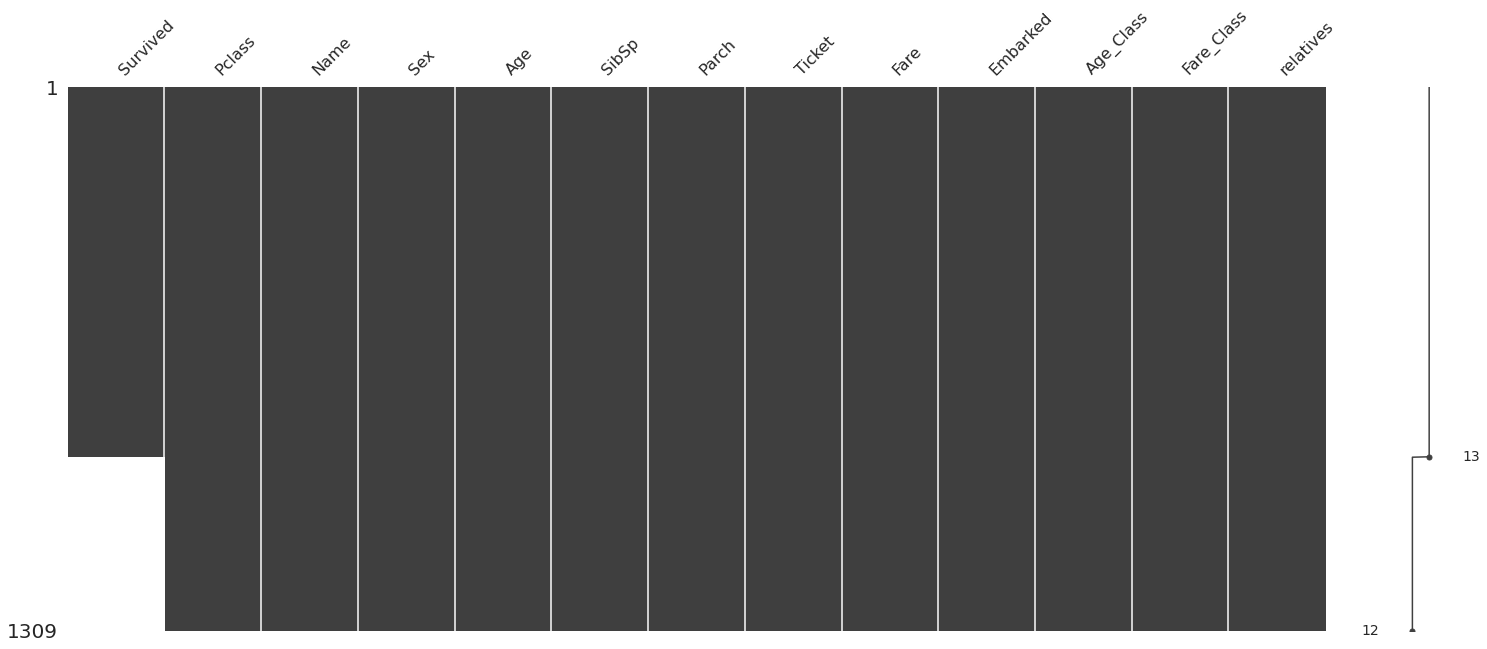

In [41]:
msno.matrix(df_combined)

**Now that's perfect! let's give the df a last look and see what we can do before moving on to model making!**

In [42]:
df_combined

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Class,Fare_Class,relatives
PassengerId,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,2.0,1.0,1
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,2.0,1.0,1
3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,2.0,1.0,0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,2.0,1.0,1
5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,2.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",1,28.0,0,0,A.5. 3236,8.0500,S,2.0,1.0,0
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C,2.0,2.0,0
1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,2.0,1.0,0


**Seems we could encode the Ticked and Embarked values and split the names to get the last names and pronouns!**

In [43]:
# let's split the names, last names and pronouns to get better details
df_combined["Last_Name"] = [name.split(',')[0].strip() for name in df_combined["Name"]]

df_combined["Name"] = [name.split(',')[1].strip() for name in df_combined["Name"]]

df_combined["Pronoun"] = [name.split('.')[0].strip() for name in df_combined["Name"]]

df_combined["Name"] = [name.split('.')[1].strip() for name in df_combined["Name"]]

In [44]:
#let's use the label encoder to encode the categorical features

l1= LabelEncoder()

l1.fit(df_combined['Embarked'])
df_combined.Embarked = l1.transform(df_combined.Embarked)

In [45]:
l1.fit(df_combined['Ticket'])
df_combined.Ticket = l1.transform(df_combined.Ticket)

In [46]:
l1.fit(df_combined['Last_Name'])
df_combined.Last_Name = l1.transform(df_combined.Last_Name)

In [47]:
l1.fit(df_combined['Pronoun'])
df_combined.Pronoun = l1.transform(df_combined.Pronoun)

In [48]:
df_combined

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Class,Fare_Class,relatives,Last_Name,Pronoun
PassengerId,,,,,,,,,,,,,,,
1,0.0,3,Owen Harris,1,22.0,1,0,720,7.2500,2,2.0,1.0,1,100,12
2,1.0,1,John Bradley (Florence Briggs Thayer),0,38.0,1,0,816,71.2833,0,2.0,1.0,1,182,13
3,1.0,3,Laina,0,26.0,0,0,914,7.9250,2,2.0,1.0,0,329,9
4,1.0,1,Jacques Heath (Lily May Peel),0,35.0,1,0,65,53.1000,2,2.0,1.0,1,267,13
5,0.0,3,William Henry,1,35.0,0,0,649,8.0500,2,2.0,1.0,0,15,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,Woolf,1,28.0,0,0,711,8.0500,2,2.0,1.0,0,753,12
1306,NaN,1,Fermina,0,39.0,0,0,834,108.9000,0,2.0,2.0,0,593,3
1307,NaN,3,Simon Sivertsen,1,38.5,0,0,872,7.2500,2,2.0,1.0,0,699,12


**Very nice**

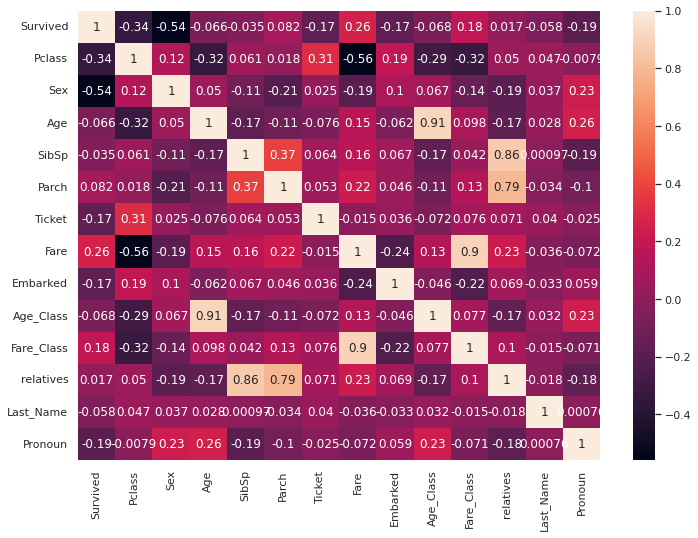

In [49]:
#create a heatmap to identify correlation between columns
sns.heatmap(df_combined.corr(),annot=True)
plt.show()

**Taking a Final look at the correlations between columns what can we see in the clean data is:**
* Survived and Fare have a significant correlation - endorsed by the graph we've seen earlier.
* PClass and ticked have a significant correlation however, we might want to take a closer look at it.
* Fare has significant correlations with a lot of columns - relatives, age and survival, endorsed by our previous analysis, older people tend to pay more, older people usually have relatives on board, more relatives : higher fare.

In [50]:
#let me export it and have a closer look on excel
df_combined.to_csv('Titanic_df.csv', index=False)

After looking closely, i couldn't see any major link to the ticket number, apart from the relatives which shared the ticket number

In [51]:
#let's get the clean version of the train data by dropping the empty rows in Survived

df_train = df_combined.dropna(subset=["Survived"])


#let's get the clean version of the test data by dropping the index from the train data we just got!

df_test = df_combined.drop(df_train.index)

In [52]:
#Then let's drop the target since it's not needed for the test data

df_test = df_test.drop(['Survived'], axis=1)

**Now we have a clean train dataset, let's work it out**

# 4.Model Making
For this notebook i will be using a lgb model and we will be doing parameter optimization with GridSearchCV!

In [53]:
#First, let's define our data

data = [c for c in df_train.columns if c not in ['Survived','Name']]

In [54]:
#set our data

X=df_train[data]
df_test=df_test[data]

#y is our target

y=df_train.Survived

In [55]:
#Apply train_test_split to get the train and test values for each

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [56]:
# define the parameters you want to test out in GridSearch

params={'boosting_type':['gbdt'], 
        'learning_rate':[0.8,0.5,0.3,0.1,0.01,0.001], 
        'max_depth':[1,3,5,7,9,12,15],
        'n_estimators':[100,300,500,700,1000,1500], 
        'num_leaves':[20,35,50,75,100,150,300,500], 
        'random_state':[42]}

**Don't worry if your model is taking a lot of time to fit, to get the best parameters GridSearch will run across all possible combinations of parameters within the given params so it may take a while depending on how many possibilities you put on the table!**

In [57]:
#Remember, folks we are dealing with a boolean prediction, the passenger either survived or it didn't, so we shall use a Classifier instead of a Regressor.
#I totally did not use a Regressor the first time around... O.O
# for this model i will be using LBGM due to the performance, but you can try whatever you want!

model = lgb.LGBMClassifier() 


#cv is for the number of folds for each fit, n_jobs=-1 automatically sets all the cores on the machine

#gscv= GridSearchCV(model,params,cv=5,n_jobs=-1,verbose=True)

#gscv.fit(X_train,y_train,eval_set=(X_test,y_test),early_stopping_rounds=50,verbose=False)

In [58]:
#y_preds=gscv.predict(X_train)
#t_preds=gscv.predict(X_test)
#print(accuracy_score(y_preds,y_train))
#print(accuracy_score(t_preds,y_test))

#preds = gscv.predict(df_test)
#gscv.best_params_

**After we get the best parameters, we can use those on the model and make our predictions!**

In [59]:
best_params = {'boosting_type': ['gbdt'],
 'learning_rate': [0.3],
 'max_depth': [8],
 'n_estimators': [100],
 'num_leaves': [20],
 'random_state': [42]}

In [60]:
gscv = GridSearchCV(model,best_params,cv=5,n_jobs=-1,verbose=1)
gscv.fit(X_train,y_train,eval_set=(X_test,y_test),early_stopping_rounds=5,verbose=False)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt'], 'learning_rate': [0.3],
                         'max_depth': [8], 'n_estimators': [100],
                         'num_leaves': [20], 'random_state': [42]},
             verbose=1)

In [61]:
#let's check for overfitting!

y_preds=gscv.predict(X_train)
t_preds=gscv.predict(X_test)

print('Train accuracy: ',accuracy_score(y_preds,y_train))
print('Test accuracy: ',accuracy_score(t_preds,y_test))

preds = gscv.predict(df_test)

Train accuracy:  0.9221556886227545
Test accuracy:  0.8116591928251121


The Train and test scores are very close, so we can't say there is overfitting!

In [63]:
#index = pd.read_csv("/kaggle/input/titanic/test.csv")["PassengerId"]
index = pd.read_csv("test.csv")["PassengerId"]

my_submission = pd.DataFrame({'PassengerId': index, "Survived": preds})

In [64]:
#remember to set the Survived values as integers, otherwise you'll get 0% accuracy

my_submission['Survived'] = my_submission['Survived'].astype('Int64')

In [65]:
my_submission.to_csv('my_submission.csv', index=False)
print('My Submission')

My Submission


/home/biolabs/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/biolabs/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/biolabs/anaconda3/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'earl

**You may get better results by tweaking the parameters, i encourage you to play around with the parameter optimization!**

# The End
**That's it folks, hope you learned a thing or two in this journey! be sure to upvote the notebook if you liked, and comment any constructive criticism about the model, this is more of a learning project so the aim wasn't to climb to the top of the leaderboard but to learn the concepts and the practical applications!**